In [48]:
import pandas as pd
from codebridge.ingest import load_txt_as_df
from codebridge.ingest import preprocess
from collections import Counter
import matplotlib.pyplot as plt

df = load_txt_as_df("../codebridge/data/python_code_data.txt", limit=1000)

# preprocess all 300 nstructions
df["tokens"] = df["instruction"].apply(lambda x: preprocess(x))

df[["instruction", "tokens"]].head()


,instruction,tokens
0,write a python program to add two numbers,"[(write, VB), (a, DT), (python, NN), (program,..."
1,write a python function to add two user provid...,"[(write, VB), (a, DT), (python, NN), (function..."
2,write a program to find and print the largest ...,"[(write, VB), (a, DT), (program, NN), (to, TO)..."
3,write a program to find and print the smallest...,"[(write, VB), (a, DT), (program, NN), (to, TO)..."
4,Write a python function to merge two given lis...,"[(write, VB), (a, DT), (python, NN), (function..."


In [49]:
# get all POS
all_pos = [tag for row in df["tokens"] for tag in row]

# count nouns and verbs
verbs = [w for (w, t) in all_pos if t.startswith("VB")]
nouns = [w for (w, t) in all_pos if t.startswith("NN")]

print("most common verbs", Counter(verbs).most_common(10))
print("most common nouns", Counter(nouns).most_common(10))

most common verbs [('write', 597), ('print', 156), ('given', 101), ('is', 100), ('return', 78), ('find', 76), ('input', 66), ('check', 62), ('using', 58), ('returns', 49)]
most common nouns [('python', 440), ('function', 416), ('program', 377), ('list', 186), ('number', 134), ('string', 94), ('numbers', 75), ('value', 39), ('elements', 35), ('area', 32)]


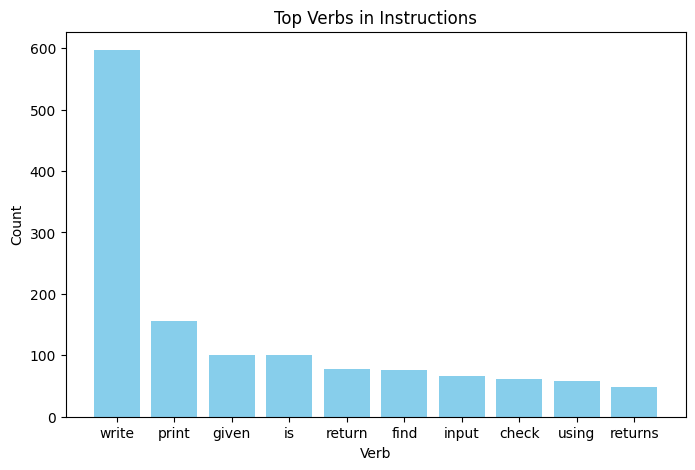

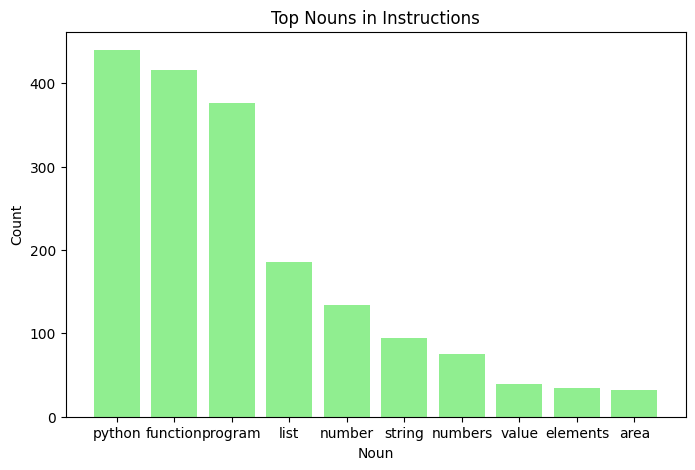

In [50]:
# verbs
verb_counts = Counter(verbs).most_common(10)
verb_df = pd.DataFrame(verb_counts, columns=["verb", "count"])

plt.figure(figsize=(8,5))
plt.bar(verb_df["verb"], verb_df["count"], color="skyblue")
plt.title("Top Verbs in Instructions")
plt.xlabel("Verb")
plt.ylabel("Count")
plt.show()

# nouns
noun_counts = Counter(nouns).most_common(10)
noun_df = pd.DataFrame(noun_counts, columns=["noun", "count"])

plt.figure(figsize=(8,5))
plt.bar(noun_df["noun"], noun_df["count"], color="lightgreen")
plt.title("Top Nouns in Instructions")
plt.xlabel("Noun")
plt.ylabel("Count")
plt.show()

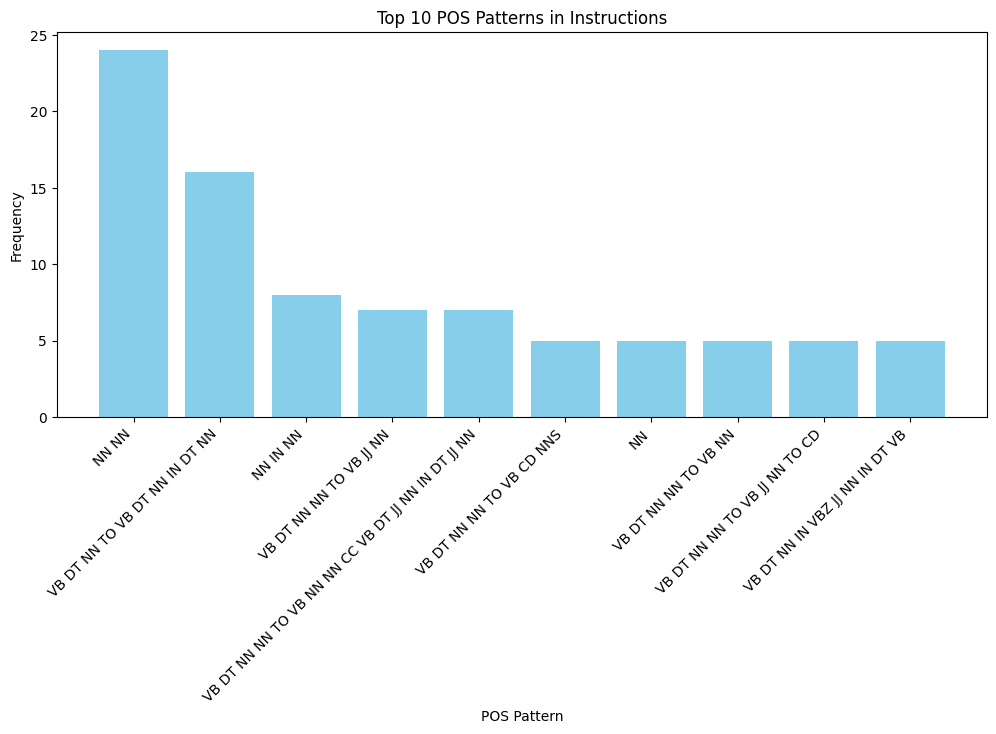

,pattern,count
0,NN NN,24
1,VB DT NN TO VB DT NN IN DT NN,16
2,NN IN NN,8
3,VB DT NN NN TO VB JJ NN,7
4,VB DT NN NN TO VB NN NN CC VB DT JJ NN IN DT J...,7
5,VB DT NN NN TO VB CD NNS,5
6,NN,5
7,VB DT NN NN TO VB NN,5
8,VB DT NN NN TO VB JJ NN TO CD,5
9,VB DT NN IN VBZ JJ NN IN DT VB,5


In [51]:
df["pos_pattern"] = df["tokens"].apply(lambda tags: " ".join(tag for _, tag in tags))

# top 10 POS patterns
pattern_counts = Counter(df["pos_pattern"])
pattern_df = pd.DataFrame(pattern_counts.most_common(10), columns=["pattern", "count"])

# POS pattern diagram
plt.figure(figsize=(12,5))
plt.bar(pattern_df["pattern"], pattern_df["count"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 POS Patterns in Instructions")
plt.xlabel("POS Pattern")
plt.ylabel("Frequency")
plt.show()

display(pattern_df)

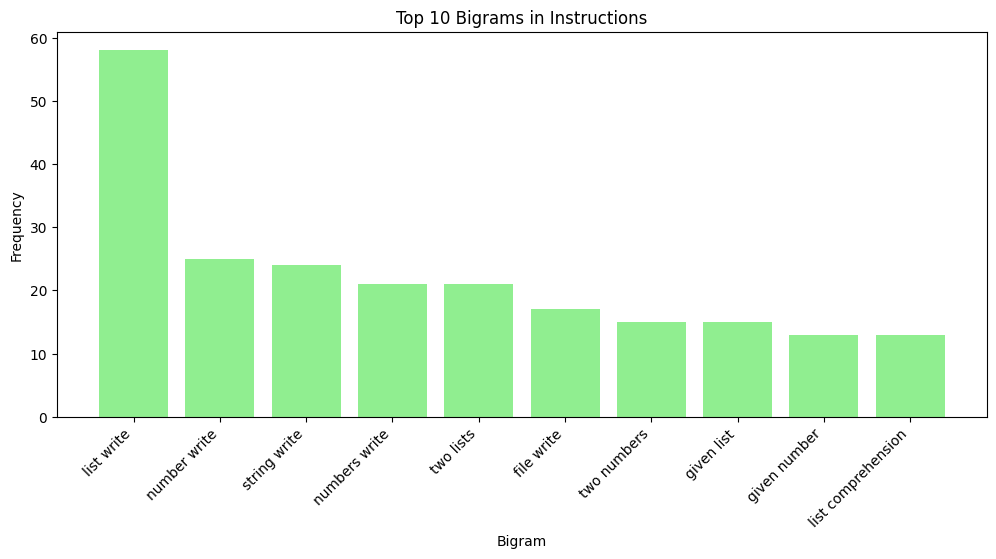

,bigram,count
0,"(list, write)",58
1,"(number, write)",25
2,"(string, write)",24
3,"(numbers, write)",21
4,"(two, lists)",21
5,"(file, write)",17
6,"(two, numbers)",15
7,"(given, list)",15
8,"(given, number)",13
9,"(list, comprehension)",13


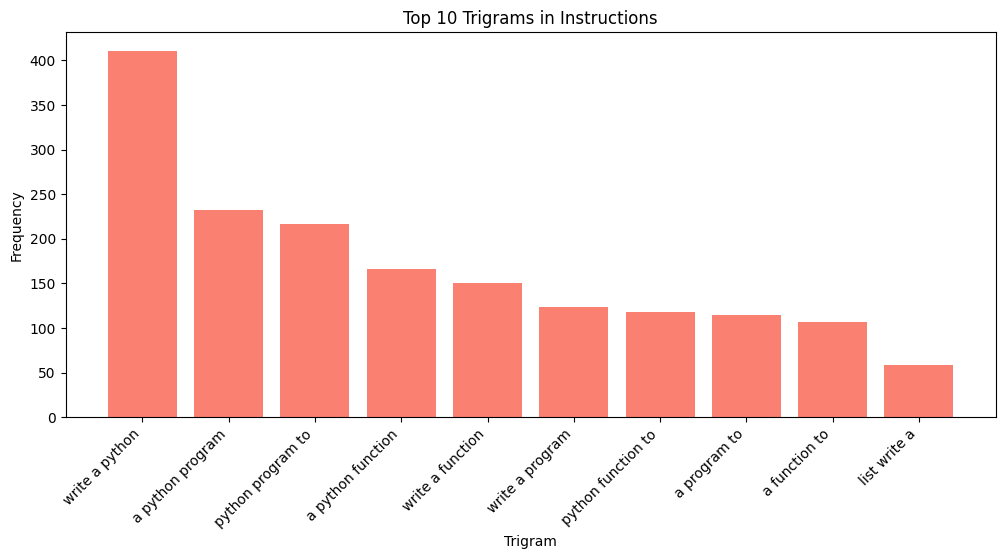

,trigram,count
0,"(write, a, python)",411
1,"(a, python, program)",232
2,"(python, program, to)",217
3,"(a, python, function)",166
4,"(write, a, function)",150
5,"(write, a, program)",123
6,"(python, function, to)",118
7,"(a, program, to)",114
8,"(a, function, to)",107
9,"(list, write, a)",58


In [52]:
from nltk import ngrams
from nltk.corpus import stopwords

# nltk stopword list
stop_words = set(stopwords.words("english"))

# words that I want to remove (because these words are not meaningful and too common)
extra_remove = {"python", "program", "code"}

# 1. gather all tokens
all_tokens = [w.lower() for row in df["tokens"] for (w, _) in row]

# generate bigrams and filter
bigrams = [
    (w1, w2) for (w1, w2) in ngrams(all_tokens, 2)
    if w1 not in stop_words and w2 not in stop_words   # filter out stopping words
    and w1 not in extra_remove and w2 not in extra_remove  # filter out words that I highlighted
]

# find top 10 bigrams
bigram_counts = Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(10), columns=["bigram", "count"])



# top 10 trigrams
trigrams = list(ngrams(all_tokens, 3))
trigram_counts = Counter(trigrams)
trigram_df = pd.DataFrame(trigram_counts.most_common(10), columns=["trigram", "count"])

# plotting bigrams
plt.figure(figsize=(12,5))
plt.bar([" ".join(b) for b in bigram_df["bigram"]], bigram_df["count"], color="lightgreen")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Bigrams in Instructions")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.show()

display(bigram_df)

# plotting bigrams
plt.figure(figsize=(12,5))
plt.bar([" ".join(t) for t in trigram_df["trigram"]], trigram_df["count"], color="salmon")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Trigrams in Instructions")
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.show()

display(trigram_df)

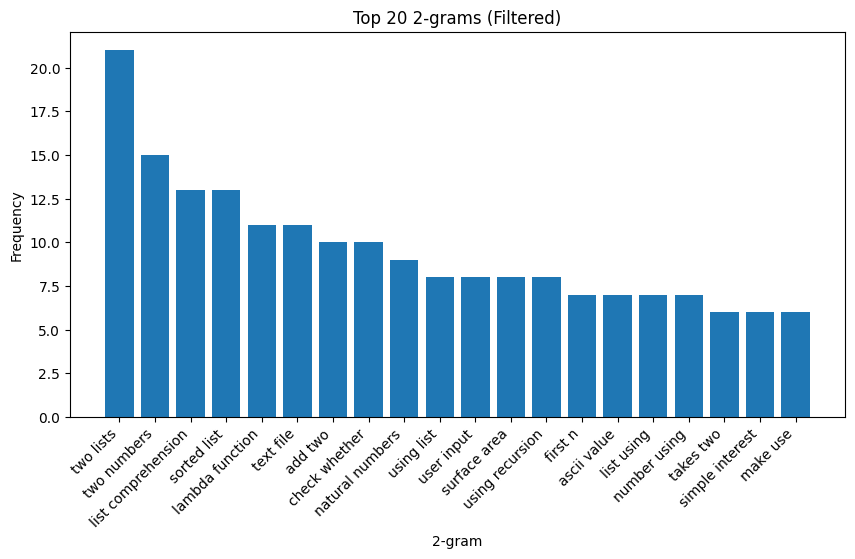

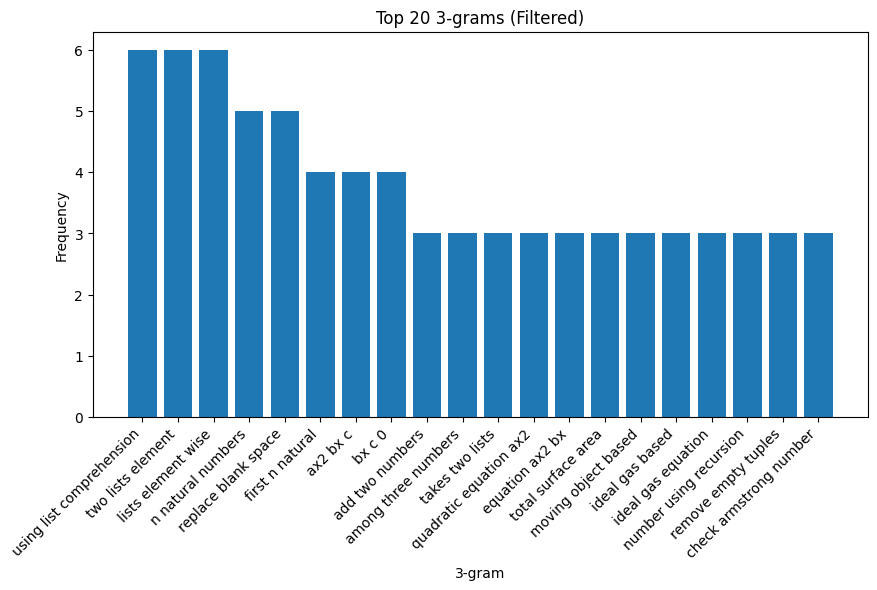

,ngram,count
0,"(using, list, comprehension)",6
1,"(two, lists, element)",6
2,"(lists, element, wise)",6
3,"(n, natural, numbers)",5
4,"(replace, blank, space)",5
5,"(first, n, natural)",4
6,"(ax2, bx, c)",4
7,"(bx, c, 0)",4
8,"(add, two, numbers)",3
9,"(among, three, numbers)",3


In [53]:
def extract_top_ngrams(df, n=2, remove_words=None, topk=10, show_plot=True):
    stop_words = set(stopwords.words("english"))
    rm = set(w.lower() for w in (remove_words or []))

    # 1. gather all tokens
    all_tokens = [w.lower() for row in df["tokens"] for (w, _) in row]

    # generate n-gram and filter
    ngram_list = [
        gram for gram in ngrams(all_tokens, n)
        if all(w not in stop_words and w not in rm for w in gram)
    ]

    # find topK
    ngram_counts = Counter(ngram_list).most_common(topk)
    ngram_df = pd.DataFrame(ngram_counts, columns=["ngram", "count"])

    # plot
    if show_plot and not ngram_df.empty:
        plt.figure(figsize=(10,5))
        plt.bar([" ".join(g) for g in ngram_df["ngram"]], ngram_df["count"])
        plt.xticks(rotation=45, ha="right")
        plt.title(f"Top {topk} {n}-grams (Filtered)")
        plt.xlabel(f"{n}-gram")
        plt.ylabel("Frequency")
        plt.show()

    return ngram_df


remove_words = {"python", "program", "code", "write", "given"}
extract_top_ngrams(df, n=2, remove_words=remove_words, topk=20)
extract_top_ngrams(df, n=3, remove_words=remove_words, topk=20)